In [2]:
%load_ext lab_black

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


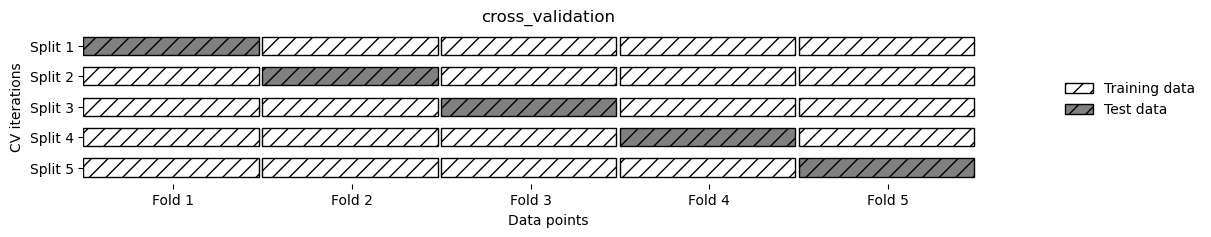

In [4]:
import mglearn

mglearn.plots.plot_cross_validation()

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
# cv: number of folds
scores = cross_val_score(logreg, iris.data, iris.target, cv=7)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.95454545 1.         0.90909091 0.95238095 0.95238095 1.
 1.        ]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [7]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


In [8]:
from sklearn.datasets import load_iris

iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


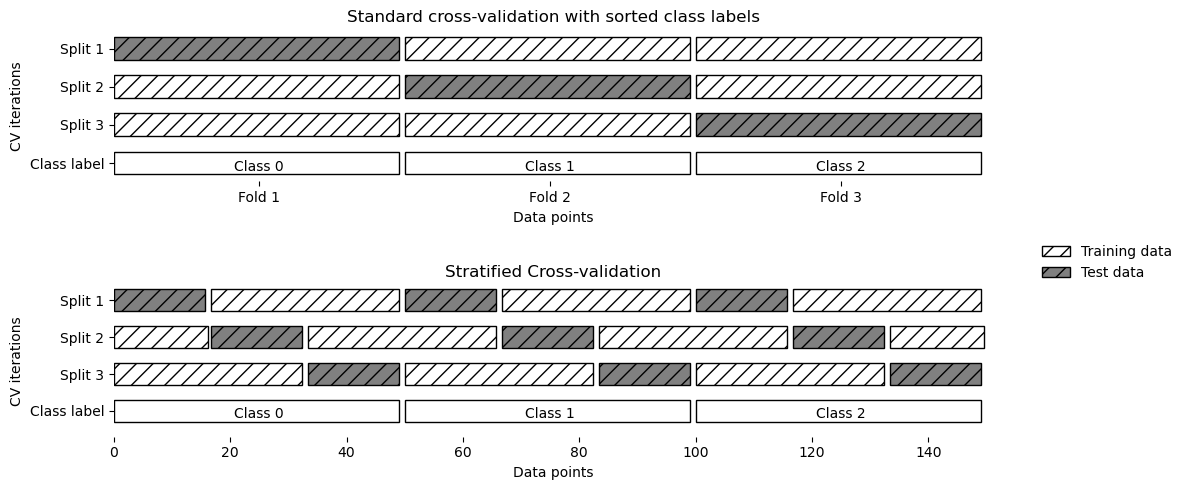

In [9]:
mglearn.plots.plot_stratified_cross_validation()

n_samples_per_fold:  50.0
[49.0, 49.0, 49.0]
[49.0, 49.0, 49.0]
[49.0, 49.0, 49.0]


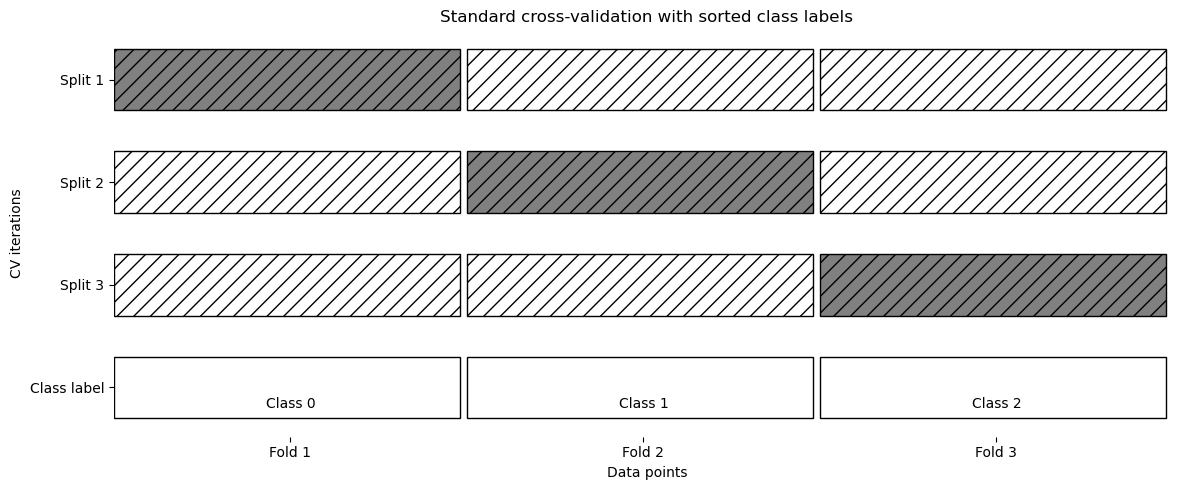

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig, both_axes = plt.subplots(1, 1, figsize=(12, 5))
axes = both_axes
axes.set_title("Standard cross-validation with sorted class labels")

axes.set_frame_on(False)

n_folds = 3
n_samples = 150

n_samples_per_fold = n_samples / float(n_folds)

print("n_samples_per_fold: ", n_samples_per_fold)
for i in range(n_folds):
    colors = ["w"] * n_folds
    colors[i] = "grey"
    print([n_samples_per_fold - 1] * n_folds)
    axes.barh(
        y=range(n_folds),
        width=[n_samples_per_fold - 1] * n_folds,
        left=i * n_samples_per_fold,
        height=0.6,
        color=colors,
        hatch="//",
        edgecolor="k",
        align="edge",
    )

axes.barh(
    y=[n_folds] * n_folds,
    width=[n_samples_per_fold - 1] * n_folds,
    left=np.arange(3) * n_samples_per_fold,
    height=0.6,
    color="w",
    edgecolor="k",
    align="edge",
)

axes.invert_yaxis()
axes.set_xlim(0, n_samples + 1)
axes.set_ylabel("CV iterations")
axes.set_xlabel("Data points")
axes.set_xticks(np.arange(n_samples_per_fold / 2.0, n_samples, n_samples_per_fold))
axes.set_xticklabels(["Fold %d" % x for x in range(1, n_folds + 1)])
axes.set_yticks(np.arange(n_folds + 1) + 0.3)
axes.set_yticklabels(["Split %d" % x for x in range(1, n_folds + 1)] + ["Class label"])
for i in range(3):
    axes.text(
        (i + 0.5) * n_samples_per_fold,
        3.5,
        "Class %d" % i,
        horizontalalignment="center",
    )

fig.tight_layout()

n_folds:  3
n_samples_per_fold:  50.0
n_subsplit:  16.666666666666668
y=[i] * n_folds [0, 0, 0]
width=[n_subsplit - 1] * n_folds [15.666666666666668, 15.666666666666668, 15.666666666666668]
left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit [  0.  50. 100.]
y=[i] * n_folds [1, 1, 1]
width=[n_subsplit - 1] * n_folds [15.666666666666668, 15.666666666666668, 15.666666666666668]
left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit [ 16.66666667  66.66666667 116.66666667]
y=[i] * n_folds [2, 2, 2]
width=[n_subsplit - 1] * n_folds [15.666666666666668, 15.666666666666668, 15.666666666666668]
left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit [ 33.33333333  83.33333333 133.33333333]


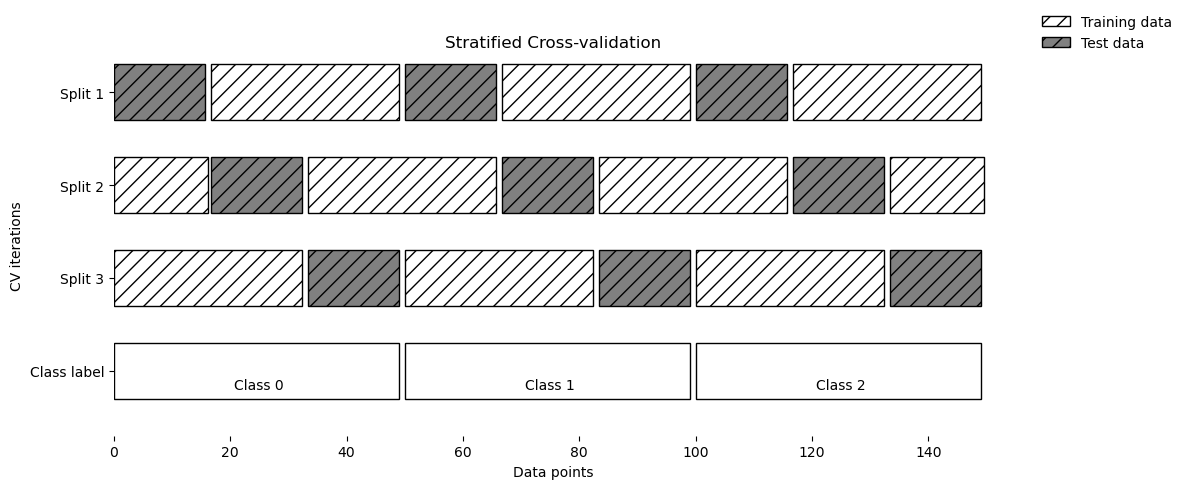

In [11]:
fig, both_axes = plt.subplots(1, 1, figsize=(12, 5))
ax = both_axes
ax.set_title("Stratified Cross-validation")
ax.set_frame_on(False)
ax.invert_yaxis()
ax.set_xlim(0, n_samples + 1)
ax.set_ylabel("CV iterations")
ax.set_xlabel("Data points")

ax.set_yticks(np.arange(n_folds + 1) + 0.3)
ax.set_yticklabels(["Split %d" % x for x in range(1, n_folds + 1)] + ["Class label"])

n_subsplit = n_samples_per_fold / 3.0
print("n_folds: ", n_folds)  # 3
print("n_samples_per_fold: ", n_samples_per_fold)  # 50
print("n_subsplit: ", n_subsplit)  # 16.666666666666668
for i in range(n_folds):
    print("y=[i] * n_folds", [i] * n_folds)
    print("width=[n_subsplit - 1] * n_folds", [n_subsplit - 1] * n_folds)
    print(
        "left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit",
        np.arange(n_folds) * n_samples_per_fold + i * n_subsplit,
    )
    test_bars = ax.barh(
        y=[i] * n_folds,
        width=[n_subsplit - 1] * n_folds,
        left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit,
        height=0.6,
        color="grey",
        hatch="//",
        edgecolor="k",
        align="edge",
    )

w = 2 * n_subsplit - 1
ax.barh(
    y=[0] * n_folds,
    width=[w] * n_folds,
    left=np.arange(n_folds) * n_samples_per_fold + (0 + 1) * n_subsplit,
    height=0.6,
    color="w",
    hatch="//",
    edgecolor="k",
    align="edge",
)
ax.barh(
    y=[1] * (n_folds + 1),
    width=[w / 2.0, w, w, w / 2.0],
    left=np.maximum(0, np.arange(n_folds + 1) * n_samples_per_fold - n_subsplit),
    height=0.6,
    color="w",
    hatch="//",
    edgecolor="k",
    align="edge",
)
training_bars = ax.barh(
    y=[2] * n_folds,
    width=[w] * n_folds,
    left=np.arange(n_folds) * n_samples_per_fold,
    height=0.6,
    color="w",
    hatch="//",
    edgecolor="k",
    align="edge",
)

ax.barh(
    y=[n_folds] * n_folds,
    width=[n_samples_per_fold - 1] * n_folds,
    left=np.arange(n_folds) * n_samples_per_fold,
    height=0.6,
    color="w",
    edgecolor="k",
    align="edge",
)

for i in range(3):
    ax.text(
        (i + 0.5) * n_samples_per_fold,
        3.5,
        "Class %d" % i,
        horizontalalignment="center",
    )
ax.set_ylim(4, -0.1)
plt.legend(
    [training_bars[0], test_bars[0]],
    ["Training data", "Test data"],
    loc=(1.05, 1),
    frameon=False,
)

fig.tight_layout()

In [12]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

In [13]:
print(
    "Cross-validation scores:\n{}".format(
        cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    )
)

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [14]:
kfold = KFold(n_splits=3)
print(
    "Cross-validation scores:\n{}".format(
        cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    )
)

Cross-validation scores:
[0. 0. 0.]


In [15]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print(
    "Cross-validation scores:\n{}".format(
        cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    )
)

Cross-validation scores:
[0.98 0.96 0.96]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [16]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print(
    "Cross-validation scores:\n{}".format(
        cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    )
)

Cross-validation scores:
[0.98 0.96 0.96]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [17]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Number of cv iterations:  150
Mean accuracy: 0.97


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

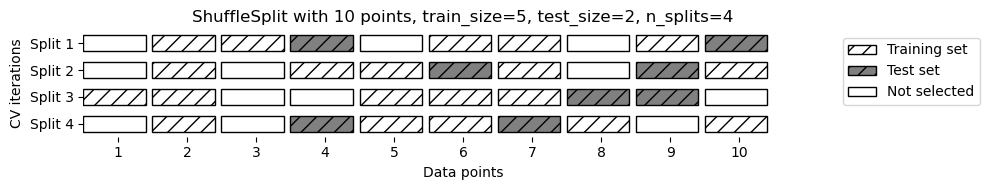

In [18]:
mglearn.plots.plot_shuffle_split()

In [19]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.98666667 1.         1.         0.98666667 0.94666667 0.94666667
 0.97333333 0.96       0.97333333 0.97333333]


/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m